In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 
import os
import pandas as pd
import plotly.express as px
import scipy
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from matplotlib.pyplot import figure 
from scipy.stats import ttest_ind
from sklearn import tree
from sklearn.decomposition import PCA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier, RidgeClassifierCV
from sklearn.metrics import accuracy_score, classification_report, f1_score, plot_confusion_matrix, precision_score,  recall_score, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import power_transform, StandardScaler, LabelEncoder
from sklearn.svm import SVC
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import itertools

from xgboost import XGBClassifier

C:\Users\Alienware R5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Alienware R5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Alienware R5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
os.chdir('c://Users//Alienware R5//Documents//DS Projects//Voice Gender')

# 1. Explorator Data Analysis

## 1.1 Initial Inspection

In [3]:
voice = pd.read_csv('voice.csv')
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
voice.shape

(3168, 21)

In [5]:
voice.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [6]:
voice.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

There are no null values in the dataframe. This is due to the data's generation process - 3,168 voice samples were analyzed using the seewave and tuneR package, so all observations are complete for each covariate. 

## 1.2 Variable Distributions

In [7]:
gender = voice['label']
pred = voice.drop('label', axis= 1)

In [8]:
gender = LabelEncoder().fit_transform(gender)
voice['label'] = gender

Text(0.5, 1.0, 'Counts per Gender')

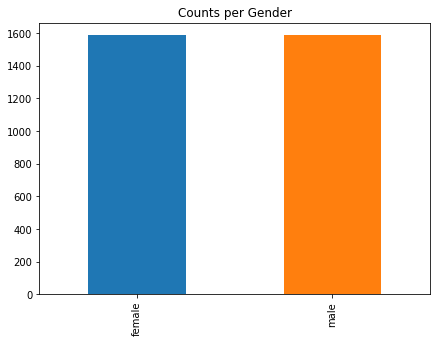

In [9]:
figure(figsize= (7, 5))
ax = voice['label'].value_counts().plot(kind= 'bar', color= ['tab:blue', 'tab:orange'])
ax.set_xticklabels(['female', 'male'])
ax.set_title('Counts per Gender')

In [10]:
voice['label'].value_counts()

0    1584
1    1584
Name: label, dtype: int64

Gender representation happens to be perfectly even in our data. As both classes are equally probable and the cost of misclassifying either gender is equally consequential, accuracy will be used as the primary metric to evaluate our machine learning models. 

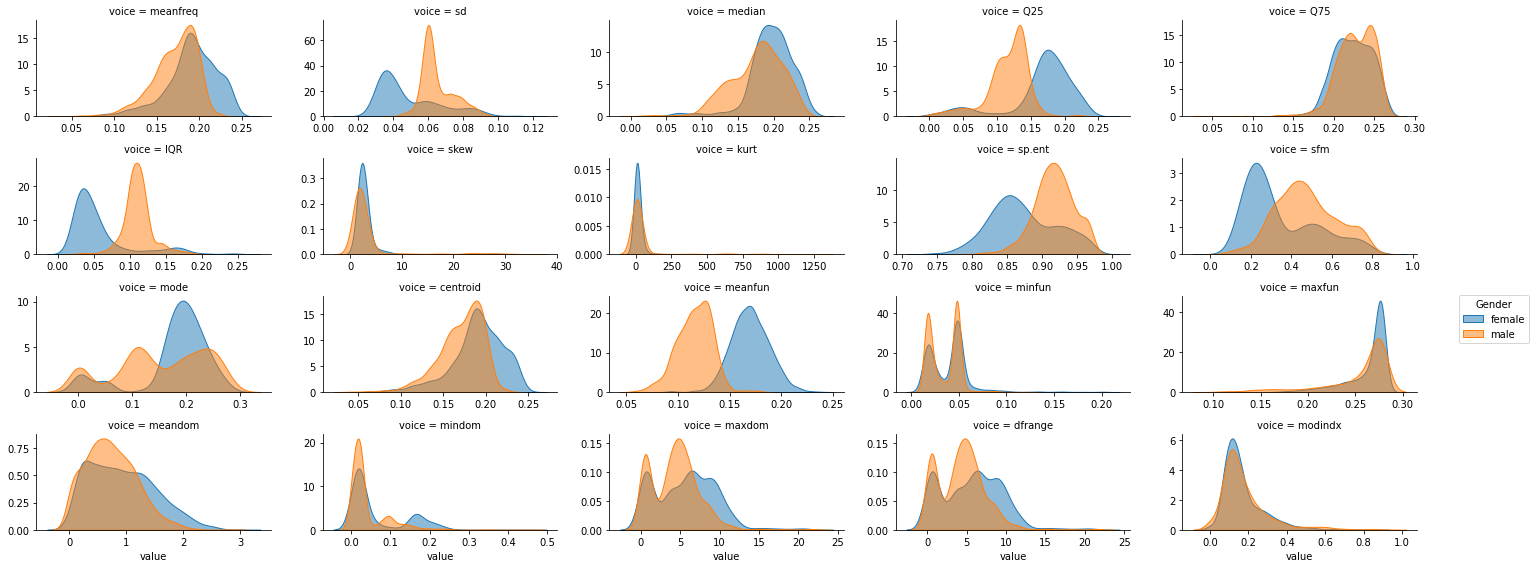

In [11]:
voice_melt = voice.assign(
    label = gender
).melt(
    id_vars= ['label'], value_vars= list(voice.columns).remove('label'),
    var_name= 'voice', value_name= 'value'
)

g = sns.FacetGrid(data= voice_melt, col= 'voice', hue= 'label', sharex= False, sharey= False, col_wrap= 5, height= 2, aspect= 2/1)
g.map(sns.kdeplot, 'value', shade= True, alpha= 0.5)

plt.legend(labels = ['female', 'male'], title = 'Gender', bbox_to_anchor = (1.5, 2.5))

Examining the facet plot of variable distributions, we can begin to formulate an idea of which variables would be best (or worst) for separating genders. Independet variables such as meanfun, IQR, and sd appear to have clear separation between genders. While variables such as modindx, maxfun, and skew have almost complete overlap - which leads us to believe that they would serve as poor predictor variables.

## 1.3 Correlation

[Text(0.5, 0, 'meanfreq'),
 Text(1.5, 0, 'sd'),
 Text(2.5, 0, 'median'),
 Text(3.5, 0, 'Q25'),
 Text(4.5, 0, 'Q75'),
 Text(5.5, 0, 'IQR'),
 Text(6.5, 0, 'skew'),
 Text(7.5, 0, 'kurt'),
 Text(8.5, 0, 'sp.ent'),
 Text(9.5, 0, 'sfm'),
 Text(10.5, 0, 'mode'),
 Text(11.5, 0, 'centroid'),
 Text(12.5, 0, 'meanfun'),
 Text(13.5, 0, 'minfun'),
 Text(14.5, 0, 'maxfun'),
 Text(15.5, 0, 'meandom'),
 Text(16.5, 0, 'mindom'),
 Text(17.5, 0, 'maxdom'),
 Text(18.5, 0, 'dfrange'),
 Text(19.5, 0, 'modindx'),
 Text(20.5, 0, 'label')]

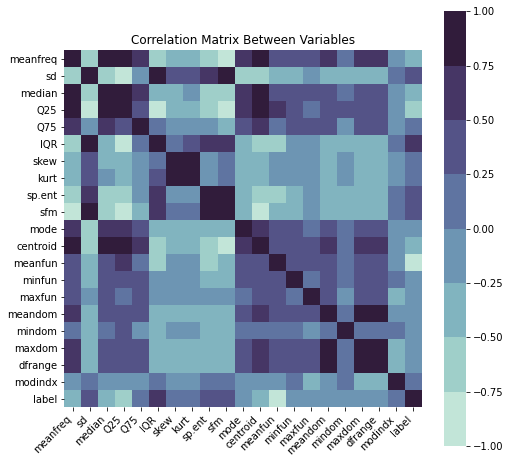

In [12]:
corr = voice.corr()

plt.figure(figsize = (8, 8))
plt.title('Correlation Matrix Between Variables')
ax = sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, 
    cmap = sns.cubehelix_palette(n_colors = 8, start=.5, rot=-.5),
    square = True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45, 
    horizontalalignment = 'right'
)

In [13]:
label_corr = corr[['label']].abs().sort_values(by = 'label', ascending= False)
label_corr['variables'] = label_corr.index
label_corr = label_corr.rename(columns = {'label': 'Gender Correlation'})
label_corr = label_corr[['variables', 'Gender Correlation']]
label_corr = label_corr[label_corr['variables'] != 'label']
label_corr.reset_index(drop = True)

,variables,Gender Correlation
0,meanfun,0.833921
1,IQR,0.618916
2,Q25,0.511455
3,sp.ent,0.490552
4,sd,0.479539
5,sfm,0.357499
6,centroid,0.337415
7,meanfreq,0.337415
8,median,0.283919
9,maxdom,0.195657


Looking at the correlation matrix, there is clear cause for concern as some independent variables have extreme (<-0.75 or >0.75) correlation with other independent variables. This is visualized in the plot through very dark squares (like the correlation between centroid and meanfreq) or very light squares (as seen between centroid and sfm). Correlation can lead to redudancies, overfitting, and increased standard errors of coefficients. It is especially problematic for classification methods such as logistic regression, KNN, naive bayes, and linear/quadratic discriminant analysis. 

In [14]:
def vif_calc(df):
    X = add_constant(df)
    vif = pd.DataFrame()
    vif['variables'] = X.columns

    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values('VIF', ascending= False)
    vif = vif.reset_index(drop = True)

    return(vif)

In [15]:
uncorr1 = vif_calc(pred)
uncorr1.loc[uncorr1['variables'] != 'const']

,variables,VIF
0,mindom,inf
1,Q25,inf
2,Q75,inf
3,IQR,inf
4,dfrange,inf
5,meanfreq,inf
6,maxdom,inf
7,centroid,inf
9,skew,40.921857
10,kurt,34.363042


In [16]:
table = vif_calc(pred)
sliced = table.nlargest(1, 'VIF')
drop_list = [sliced._get_value(0, 'variables')]
cur_vif = sliced._get_value(0, 'VIF')

while cur_vif > 5: 
    table = vif_calc(pred.drop(drop_list, axis = 1))
    sliced = table.nlargest(2, 'VIF')
    value = sliced._get_value(0, 'variables')
    cur_vif = sliced._get_value(0, 'VIF')   

    if value == 'const':
        value = sliced._get_value(1, 'variables')
        cur_vif = sliced._get_value(1, 'VIF')

    drop_list.append(value)
    
uncorr_df = table[table['variables'] != 'const']
uncorr_var = list(uncorr_df.variables)
uncorr_df

,variables,VIF
1,dfrange,4.133755
2,meandom,3.621116
3,IQR,2.848241
4,sp.ent,2.832538
5,mode,2.065601
6,kurt,2.003317
7,modindx,1.802417
8,meanfun,1.780329
9,Q75,1.611750
10,maxfun,1.467140


In [17]:
uncorr_df = uncorr_df.merge(label_corr).sort_values('Gender Correlation', ascending = False)
uncorr_df

,variables,VIF,Gender Correlation
7,meanfun,1.780329,0.833921
2,IQR,2.848241,0.618916
3,sp.ent,2.832538,0.490552
0,dfrange,4.133755,0.192213
1,meandom,3.621116,0.191067
4,mode,2.065601,0.171775
9,maxfun,1.467140,0.166461
10,minfun,1.387933,0.136692
5,kurt,2.003317,0.087195
8,Q75,1.611750,0.066906


Variance inflation factors were iteratively calculated for all variables, with the largest VIF value being removed until all VIF values were below the standard value of 5. The initial table of VIF values included eight "inf" values. Looking at the formula for VIF, we can make sense of its meaning: 

$VIF_{i} = \frac{1}{1 - R_i^2}$

So, for predictors with infinite VIFs, a multilinear regression model composed of all other variables achieved an $R^2$ value of close to 1. In other words, linear combinations of other variables explain close to 100% of the variation for variables such as mindom. A list of uncorrelated variables was kept and will be used in the future for specific methods.

## 1.4 PCA

In [18]:
scaler = StandardScaler().fit(voice)
transformed = pd.DataFrame(scaler.transform(voice))
transformed.columns = voice.columns

v_scaled = transformed.drop('label', axis = 1)

In [19]:
pca_model = PCA().fit(v_scaled)
v_pca = pd.DataFrame(pca_model.transform(v_scaled))
v_pca.columns = np.arange(1, 21)

Text(0, 0.5, 'Variance explained')

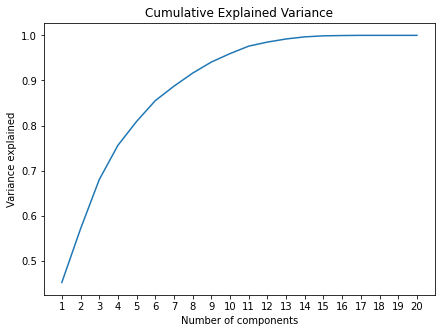

In [20]:
figure(figsize = (7, 5))
plt.plot(np.cumsum(pca_model.explained_variance_ratio_))
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of components')
plt.xticks(np.arange(20), np.arange(1, 21))
plt.ylabel('Variance explained')

Text(0, 0.5, 'Explained variance per component')

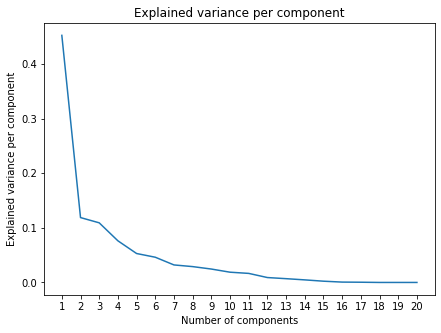

In [21]:
figure(figsize = (7, 5))
plt.plot(pca_model.explained_variance_ratio_)
plt.title('Explained variance per component')
plt.xlabel('Number of components')
plt.xticks(np.arange(20), np.arange(1, 21))
plt.ylabel('Explained variance per component')

Principle component analysis was conducted including our dependent variable of gender. Therefore, principle components cannot and will not be used as predictors in further analysis. PCA can be used for predictive purposes in order to counter multicollinearity and reduce dimensions (especially when p > n), but PCA also reduces the interpretability of machine learning models. Instead, to counter multicollinearity, conscientious variable selection was done using VIF as a guiding metric. 

Examining cumulative explained variance, nine principle components would be sufficient at explaining 90% of the variance in the dataset. The first principle component explains roughly 45% of the variance. Afterwards, there is an severe dropoff in explanitory power - with the second principle component explaining roughly 10% of the variance and all successive components explaining <10% of the variance.

Text(0.5, 1.0, 'PCA loadings by Variable')

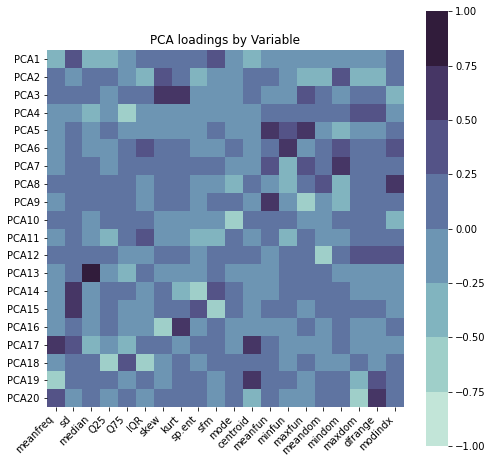

In [22]:
figure(figsize = (8, 8))

ax = sns.heatmap(pca_model.components_, vmin = -1, vmax = 1, center = 0,
                 cmap= sns.cubehelix_palette(n_colors = 8, start=.5, rot=-.5),
                 yticklabels= ['PCA'+ str(x) for x in range(1, pca_model.n_components_+1)],
                 xticklabels= list(v_scaled.columns),
                 square = True)

ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation = 45, 
    horizontalalignment = 'right'
)

ax.set_title('PCA loadings by Variable')

After constructing a correlation heatmap between variables and principle components, we can see the aforementioned problem with interpretability; with each PC having a relationship with every variable, it is difficult to get a clear idea of what each PC "means". The first principle component appears to be negatively correlated with meanfreq, median, Q25, centroid, and a few others and is positively correlated with sd and sfm.

In [23]:
v_pca_int = pd.DataFrame(pca_model.transform(v_scaled))
v_pca_int['label'] = voice.label

v_pca_corr = v_pca_int.corr()

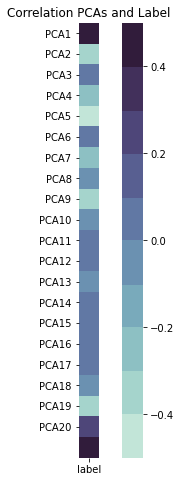

In [24]:
plt.figure(figsize = (8, 8))
plt.title('Correlation PCAs and Label')
ax = sns.heatmap(v_pca_corr[['label']], vmin = -0.50, vmax = 0.50, center = 0, 
    cmap = sns.cubehelix_palette(n_colors = 10, start=.5, rot=-.5),
    yticklabels= ['PCA'+ str(x) for x in range(1, pca_model.n_components_+1)],
    square = True
)

## 1.5 Preparing Data

In [25]:
v_yeong = power_transform(pred)
v_yeong = pd.DataFrame(v_yeong)
v_yeong.columns = pred.columns

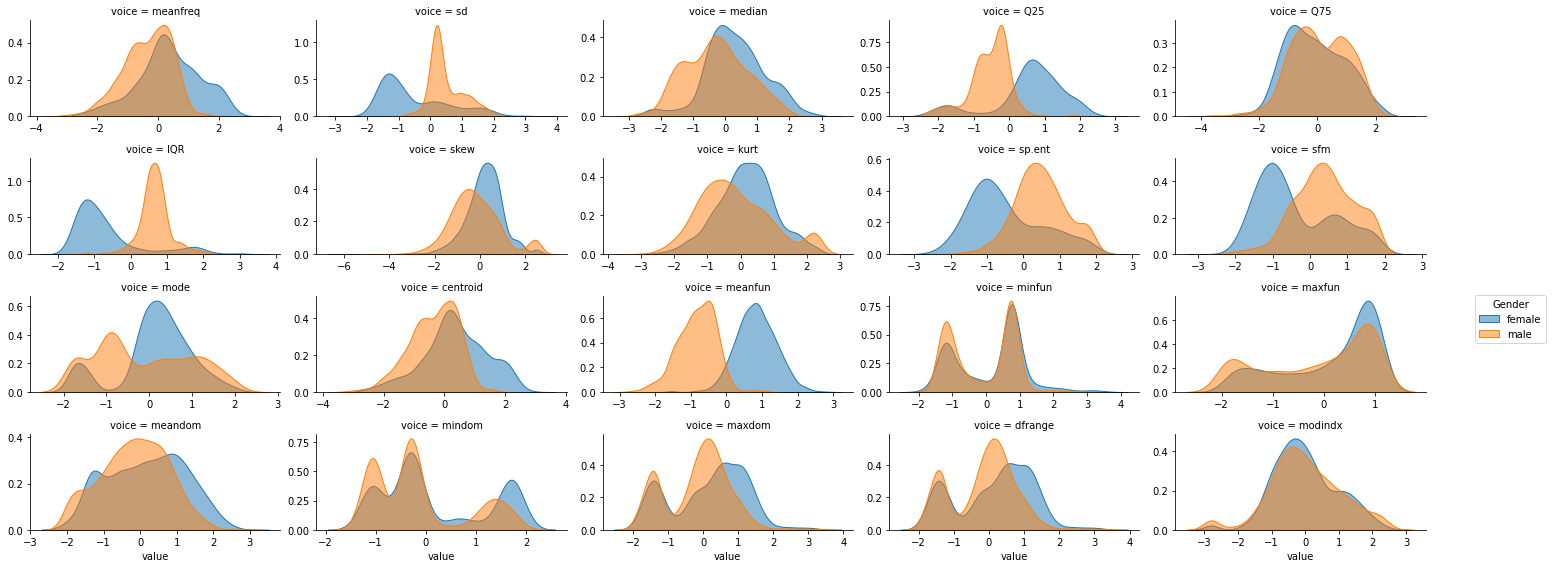

In [26]:
v_yeong_melt = v_yeong.assign(
    label = gender
).melt(
    id_vars= ['label'], value_vars= list(voice.columns).remove('label'),
    var_name= 'voice', value_name= 'value'
)

g = sns.FacetGrid(data= v_yeong_melt, col= 'voice', hue= 'label', sharex= False, sharey= False, col_wrap= 5, height= 2, aspect= 2/1)
g.map(sns.kdeplot, 'value', shade= True, alpha= 0.5)

plt.legend(labels = ['female', 'male'], title = 'Gender', bbox_to_anchor = (1.5, 2.5))

In [27]:
data_dict = {'Unscaled': pred,
    'Unscaled uncorrelated': pred[uncorr_var],
    'Scaled': v_scaled,
    'Scaled uncorrelated': v_scaled[uncorr_var],
    'Yeong-Johnson': v_yeong,
    'Yeong-Johnson uncorrelated': v_yeong[uncorr_var],
    'PCA': v_pca} 

# 2. Logistic Regression

## 2.1 Single-Variable Logistic Regression

In [28]:
def df_viz(df, title):
    df.set_index([pd.Index(list(range(len(df))))], inplace = True)
    return(df.style.background_gradient(cmap = "Blues").set_caption(title))   

In [29]:
variables = []
scores = []
Cs = []

for indep in list(pred.columns):
    single = pd.DataFrame(pred.loc[:, indep])

    simp_log = LogisticRegressionCV(cv= 10).fit(single, gender)
    score = np.mean(cross_val_score(simp_log, single, gender, cv= 10))

    scores.append(score)
    Cs.append(simp_log.C_[0])

simp_table = pd.DataFrame({'Data':pred.columns, 'C': Cs, 'Accuracy': scores})
simp_table.set_index([pd.Index(pred.columns)], inplace = True)
simp_table = simp_table.sort_values(by = 'Accuracy', ascending= False)

In [30]:
df_viz(simp_table, 'Single Logistic Regression Metrics')

,Data,C,Accuracy
0,meanfun,0.005995,0.953272
1,IQR,2.782559,0.889834
2,Q25,0.005995,0.854436
3,sd,0.046416,0.794474
4,sp.ent,0.005995,0.751575
5,sfm,0.000100,0.700349
6,mode,0.005995,0.648914
7,centroid,0.005995,0.644184
8,meanfreq,0.005995,0.644184
9,median,0.005995,0.619584


Text(0.5, 0, 'meanfun')

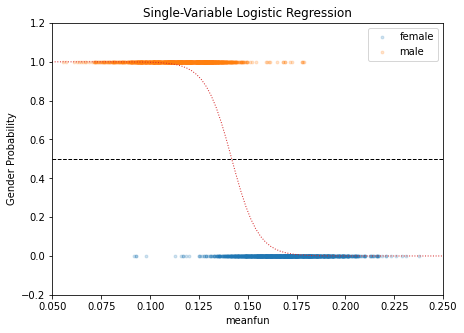

In [31]:
meanfun_log = LogisticRegressionCV().fit(pred[['meanfun']], gender)

figure(figsize = (7, 5))
plt.scatter(pred.meanfun[gender == 0], gender[gender == 0], color = 'tab:blue', s=8, alpha=0.2, label = 'female')
plt.scatter(pred.meanfun[gender == 1], gender[gender == 1], color = 'tab:orange', s=8, alpha=0.2, label = 'male')

xs = np.linspace(0.0, 0.25, 100)
fs = meanfun_log.intercept_[0] + meanfun_log.coef_[0][0] * xs
ys = [1/(1 + np.exp(-i)) for i in fs]
ys_2 = [0.5 for i in range(100)]

plt.plot(xs, ys, 'k', lw = 1, ls = ':', color= 'tab:red')
plt.plot(xs, ys_2, 'k', lw = 1, ls = '--')
plt.ylim(-0.20, 1.20)
plt.xlim(0.05, 0.25)
plt.legend()
plt.title('Single-Variable Logistic Regression')
plt.ylabel('Gender Probability')
plt.xlabel('meanfun')

## 2.2 Two-Variable Logistic Regression

In [32]:
def init_check(model, model_name, data):
    init = round(np.mean(cross_val_score(model, data, gender, cv = 10)), 6)
    print(f'Initial {model_name} accuracy: {init}')

In [33]:
init_check(LogisticRegression(), 'two-variable logistic regression', pred[['meanfun', 'IQR']])

Initial two-variable logistic regression accuracy: 0.924554


In [34]:
two_log = LogisticRegressionCV(cv= 10).fit(pred[['meanfun', 'IQR']], gender)

b = two_log.intercept_[0]
w1, w2 = two_log.coef_.T

c = -b/w2
m = -w1/w2

Text(0.5, 0, 'meanfun')

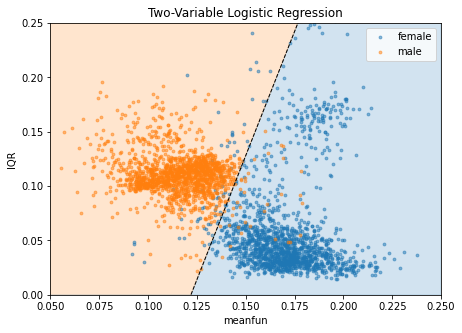

In [35]:
figure(figsize = (7, 5))
meanfun = pred.meanfun
IQR = pred.IQR

ymin, ymax = 0.0, 0.25
xmin, xmax = 0.05, 0.25
xd = np.array([xmin, xmax])
yd = m*xd + c

plt.plot(xd, yd, 'k', lw = 1, ls = "--")
plt.fill_between(xd, yd, ymin, color = 'tab:blue', alpha = 0.2)
plt.fill_between(xd, yd, ymax, color = 'tab:orange', alpha = 0.2)

plt.scatter(meanfun[gender == 0], IQR[gender == 0], s=8, alpha=0.5, label = 'female')
plt.scatter(meanfun[gender == 1], IQR[gender == 1], s=8, alpha=0.5, label = 'male')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.legend()
plt.title('Two-Variable Logistic Regression')
plt.ylabel('IQR')
plt.xlabel('meanfun')

In [36]:
two_pred = two_log.predict(pred[['meanfun', 'IQR']])
two_tab = voice[['IQR', 'meanfun', 'label']]
two_tab['pred'] = two_pred

def errors(one, two):
    empty = []

    for x, y in zip(one, two): 
        if ((x == y) and (y == 1)):
            empty.append(0) 
        elif ((x == y) and (y == 0)): 
            empty.append(1) 
        elif ((x == 1) and (y == 0)):
            empty.append(2) 
        else: 
            empty.append(3) 

    return empty 

two_tab['error'] = errors(two_tab.label, two_tab.pred)
two_tab['error'] = error_trans =  LabelEncoder().fit_transform(two_tab.error)

Text(0.5, 0, 'meanfun')

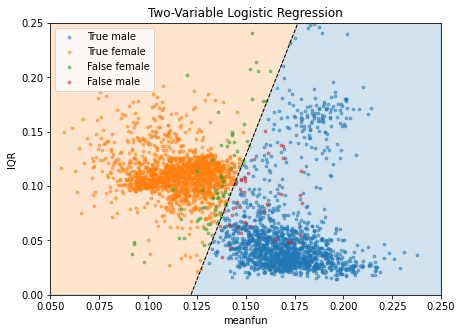

In [37]:
figure(figsize = (7, 5))
plt.plot(xd, yd, 'k', lw = 1, ls = "--")
plt.fill_between(xd, yd, ymin, color = 'tab:blue', alpha = 0.2)
plt.fill_between(xd, yd, ymax, color = 'tab:orange', alpha = 0.2)

plt.scatter(meanfun[error_trans == 1], IQR[error_trans == 1], s=8, alpha=0.5, label = "True male")
plt.scatter(meanfun[error_trans == 0], IQR[error_trans == 0], s=8, alpha=0.5, label = "True female")
plt.scatter(meanfun[error_trans == 3], IQR[error_trans == 3], s=8, alpha=0.5, label = "False female")
plt.scatter(meanfun[error_trans == 2], IQR[error_trans == 2], s=8, alpha=0.5, label = "False male")

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.legend()
plt.title('Two-Variable Logistic Regression')
plt.ylabel('IQR')
plt.xlabel('meanfun')

## 2.3 Multiple Logistic Regression 

In [38]:
init_check(LogisticRegression(), 'logistic regression', pred)

Initial logistic regression accuracy: 0.85924


In [39]:
log_data = ['Unscaled', 'Unscaled uncorrelated', 'Scaled', 'Scaled uncorrelated',
    'Yeong-Johnson', 'Yeong-Johnson uncorrelated', 'PCA']
metric_names = ['Accuracy', 'F1', 'Precision', 'Recall']
log_df = pd.DataFrame()

for name in log_data: 
    log_fit = LogisticRegressionCV(cv= 10).fit(data_dict[name], gender)

    log_accuracy = cross_val_score(log_fit, data_dict[name], gender, scoring= 'accuracy', cv= 10)
    log_f1 = cross_val_score(log_fit, data_dict[name], gender, scoring= 'f1', cv= 10)
    log_precision = cross_val_score(log_fit, data_dict[name], gender, scoring= 'precision', cv= 10)
    log_recall = cross_val_score(log_fit, data_dict[name], gender, scoring= 'recall', cv= 10)

    scores = pd.DataFrame([[name, log_fit.C_[0], log_accuracy.mean(), log_f1.mean(), log_precision.mean(), log_recall.mean()]],
    columns= ['Data', 'Alpha'] + metric_names)
    log_df = log_df.append(scores) # 600

In [40]:
df_viz(log_df, 'Multiple Logistic Regression Metrics')

,Data,Alpha,Accuracy,F1,Precision,Recall
0,Unscaled,1291.549665,0.965912,0.966292,0.960582,0.972876
1,Unscaled uncorrelated,10000.000000,0.967490,0.967832,0.963781,0.972896
2,Scaled,0.359381,0.967172,0.967433,0.963468,0.972255
3,Scaled uncorrelated,0.046416,0.967490,0.967901,0.962641,0.974154
4,Yeong-Johnson,0.359381,0.965594,0.965929,0.961121,0.971622
5,Yeong-Johnson uncorrelated,0.046416,0.964963,0.965342,0.961195,0.970369
6,PCA,0.359381,0.967172,0.967433,0.963468,0.972255


## 2.4 Best Logistic Regression

In [41]:
data_names = ['Scaled', 'Yeong-Johnson', 'PCA'] 
for_log_df = pd.DataFrame()

for names in data_names:
    data = data_dict[names]

    last = ()
    proxy = []
    variables = []
    var_list = list(data.columns)
    old_score, best_score = 0, 0.1
    temp_df = pd.DataFrame()

    while best_score > old_score: 
        old_score = best_score
        df = pd.DataFrame()

        for col in var_list:
            variables = list(last)
            variables.append(col)

            log_fit = LogisticRegressionCV(cv= 10).fit(data[variables], gender)
            log_accuracy = cross_val_score(log_fit, data[variables], gender, cv= 10, scoring= 'accuracy')

            scores = pd.DataFrame([[variables, col, log_fit.C_[0], log_accuracy.mean()]], 
            columns = ['Data', 'Single Var', 'Alpha', 'Accuracy'])
            df = df.append(scores)

        sliced = df.nlargest(1, 'Accuracy')
        temp_df = temp_df.append(sliced)
        best_score = sliced._get_value(0, 'Accuracy')
        best_var = sliced._get_value(0, 'Single Var')
        var_list.remove(best_var)
        proxy.append(best_var)
        last = tuple(proxy)

    sliced_2 = temp_df.nlargest(1, 'Accuracy')
    best_vars = sliced_2._get_value(0, 'Data')
    best_vars.sort()
    best_vars_str = [str(x) for x in best_vars]
    best_vars_stringed = ', '.join(best_vars_str)
    
    log_fit = LogisticRegressionCV(cv= 10).fit(data[best_vars], gender)
    log_accuracy = cross_val_score(log_fit, data[best_vars], gender, cv= 10, scoring= 'accuracy')
    log_f1 = cross_val_score(log_fit, data[best_vars], gender, cv= 10, scoring= 'f1')
    log_precision = cross_val_score(log_fit, data[best_vars], gender, cv= 10, scoring= 'precision')
    log_recall = cross_val_score(log_fit, data[best_vars], gender, cv= 10, scoring= 'recall')

    scores2 = pd.DataFrame([[names + ': ' + best_vars_stringed, log_fit.C_[0], log_accuracy.mean(), log_f1.mean(), log_precision.mean(), log_recall.mean()]], 
    columns = ["Data", 'C'] + metric_names)

    for_log_df = for_log_df.append(scores2) # 2500

In [42]:
df_viz(for_log_df, 'Multiple Logistic Regression Forward Selection Metrics')

,Data,C,Accuracy,F1,Precision,Recall
0,"Scaled: IQR, Q75, meanfreq, meanfun, minfun, mode, skew",0.359381,0.971278,0.971422,0.969940,0.973525
1,"Yeong-Johnson: Q25, Q75, meanfun, minfun, sfm, sp.ent",0.359381,0.971908,0.972096,0.968192,0.976674
2,"PCA: 1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 16, 17",0.359381,0.970962,0.971232,0.967183,0.976041


In [43]:
### WHY IS ONE DOUBLED??? ###
data_names = ['Scaled', 'Yeong-Johnson', 'PCA'] 
back_log_df = pd.DataFrame()

for names in data_names:
    data = data_dict[names]

    last = (data.columns)
    proxy = []
    variables = []
    var_list = list(data.columns)
    old_score, best_score = 0, 0.1
    temp_df = pd.DataFrame()

    while best_score > old_score: 
        old_score = best_score
        df = pd.DataFrame()

        for col in var_list:
            variables = list(last)
            variables.append(col)

            log_fit = LogisticRegressionCV(cv= 10).fit(data[variables], gender)
            log_accuracy = cross_val_score(log_fit, data[variables], gender, cv= 10, scoring= 'accuracy')

            scores = pd.DataFrame([[variables, col, log_fit.C_[0], log_accuracy.mean()]], 
            columns = ['Data', 'Single Var', 'Alpha', 'Accuracy'])
            df = df.append(scores)

        sliced = df.nlargest(1, 'Accuracy')
        temp_df = temp_df.append(sliced)
        best_score = sliced._get_value(0, 'Accuracy')
        best_var = sliced._get_value(0, 'Single Var')
        var_list.remove(best_var)
        proxy.append(best_var)
        last = tuple(var_list)

    sliced_2 = temp_df.nlargest(1, 'Accuracy')
    best_vars = sliced_2._get_value(0, 'Data')
    best_vars.sort()
    best_vars_str = [str(x) for x in best_vars]
    best_vars_stringed = ', '.join(best_vars_str)
    
    log_fit = LogisticRegressionCV(cv= 10).fit(data[best_vars], gender)
    log_accuracy = cross_val_score(log_fit, data[best_vars], gender, cv= 10, scoring= 'accuracy')
    log_f1 = cross_val_score(log_fit, data[best_vars], gender, cv= 10, scoring= 'f1')
    log_precision = cross_val_score(log_fit, data[best_vars], gender, cv= 10, scoring= 'precision')
    log_recall = cross_val_score(log_fit, data[best_vars], gender, cv= 10, scoring= 'recall')

    scores2 = pd.DataFrame([[names + ': ' + best_vars_stringed, log_fit.C_[0], log_accuracy.mean(), log_f1.mean(), log_precision.mean(), log_recall.mean()]], 
    columns = ["Data", 'C'] + metric_names)

    back_log_df = back_log_df.append(scores2) # 3500
    ### What???###

In [44]:
df_viz(back_log_df, 'Multiple Logistic Regression Forward Selection Metrics') 

,Data,C,Accuracy,F1,Precision,Recall
0,"Scaled: IQR, Q25, Q75, centroid, dfrange, kurt, maxdom, maxfun, meandom, meanfreq, meanfun, meanfun, median, mindom, minfun, mode, modindx, sd, sfm, skew, sp.ent",0.359381,0.967804,0.968136,0.962411,0.974775
1,"Yeong-Johnson: IQR, Q25, Q75, centroid, dfrange, kurt, maxdom, maxfun, meandom, meanfreq, meanfun, meanfun, median, mindom, minfun, mode, modindx, sd, skew, sp.ent",0.046416,0.966542,0.966917,0.961241,0.973525
2,"PCA: 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20",0.359381,0.967805,0.968102,0.963023,0.974146


In [45]:
def together_df(forward, backward):
    backward['Selection Method'] = ['Backwards'] * len(backward)
    forward['Selection Method'] = ['Forwards'] * len(forward)

    backward = backward.reindex(columns = (['Data', 'Selection Method'] + list([i for i in backward.columns if i not in ['Data', 'Selection Method']])))
    forward = forward.reindex(columns = (['Data', 'Selection Method'] + list([i for i in forward.columns if i not in ['Data', 'Selection Method']])))

    together = backward.append(forward, ignore_index= True)
    return(together)

In [46]:
tog_log_df = together_df(for_log_df, back_log_df)

# 3. Ridge Classifier

In [47]:
init_check(RidgeClassifier(), 'ridge classifier', pred)

Initial ridge classifier accuracy: 0.937191


In [48]:
ridge_data = ['Unscaled', 'Unscaled uncorrelated', 'Scaled', 'Scaled uncorrelated', 
    'Yeong-Johnson', 'Yeong-Johnson uncorrelated', 'PCA'] 
ridge_df = pd.DataFrame()

for name in ridge_data: 
    
    ridge_fit = RidgeClassifierCV(cv= 10).fit(data_dict[name], gender)

    ridge_accuracy = cross_val_score(ridge_fit, data_dict[name], gender, cv= 10, scoring= 'accuracy')
    ridge_f1 = cross_val_score(ridge_fit, data_dict[name], gender, cv= 10, scoring= 'f1')
    ridge_precision = cross_val_score(ridge_fit, data_dict[name], gender, cv= 10, scoring= 'precision')
    ridge_recall = cross_val_score(ridge_fit, data_dict[name], gender, cv= 10, scoring= 'recall')

    scores = pd.DataFrame([[name, ridge_fit.alpha_, ridge_accuracy.mean(), ridge_f1.mean(), ridge_precision.mean(), ridge_recall.mean()]], 
    columns = ['Data', 'Alpha'] + metric_names)

    ridge_df = ridge_df.append(scores) 

In [49]:
df_viz(ridge_df, 'Ridge Classifier Metrics')

,Data,Alpha,Accuracy,F1,Precision,Recall
0,Unscaled,0.100000,0.963070,0.963706,0.951862,0.976678
1,Unscaled uncorrelated,0.100000,0.964020,0.964611,0.954712,0.975424
2,Scaled,0.100000,0.963386,0.963960,0.952237,0.976678
3,Scaled uncorrelated,0.100000,0.964969,0.965503,0.956392,0.975424
4,Yeong-Johnson,0.100000,0.964333,0.964885,0.952750,0.977932
5,Yeong-Johnson uncorrelated,1.000000,0.966544,0.967017,0.957503,0.977311
6,PCA,0.100000,0.963386,0.963960,0.952237,0.976678


In [50]:
data_names = ['Scaled', 'Yeong-Johnson', 'PCA'] 
for_ridge_df = pd.DataFrame()

for names in data_names:
    data = data_dict[names]

    last = ()
    proxy = []
    variables = []
    var_list = list(data.columns)
    old_score, best_score = 0, 0.1
    temp_df = pd.DataFrame()

    while best_score > old_score: 
        old_score = best_score
        df = pd.DataFrame()

        for col in var_list:
            variables = list(last)
            variables.append(col)

            ridge_fit = RidgeClassifierCV(cv= 10).fit(data[variables], gender)
            ridge_accuracy = cross_val_score(ridge_fit, data[variables], gender, cv= 10, scoring= 'accuracy')

            scores = pd.DataFrame([[variables, col, ridge_fit.alpha_, ridge_accuracy.mean()]], 
            columns = ['Data', 'Single Var', 'Alpha', 'Accuracy'])
            df = df.append(scores)

        sliced = df.nlargest(1, 'Accuracy')
        temp_df = temp_df.append(sliced)
        best_score = sliced._get_value(0, 'Accuracy')
        best_var = sliced._get_value(0, 'Single Var')
        var_list.remove(best_var)
        proxy.append(best_var)
        last = tuple(proxy)

    sliced_2 = temp_df.nlargest(1, 'Accuracy')
    best_vars = sliced_2._get_value(0, 'Data')
    best_vars.sort()
    best_vars_str = [str(x) for x in best_vars]
    best_vars_stringed = ', '.join(best_vars_str)
    
    ridge_fit = RidgeClassifierCV(cv= 10).fit(data[best_vars], gender)
    ridge_accuracy = cross_val_score(ridge_fit, data[best_vars], gender, cv= 10, scoring= 'accuracy')
    ridge_f1 = cross_val_score(ridge_fit, data[best_vars], gender, cv= 10, scoring= 'f1')
    ridge_precision = cross_val_score(ridge_fit, data[best_vars], gender, cv= 10, scoring= 'precision')
    ridge_recall = cross_val_score(ridge_fit, data[best_vars], gender, cv= 10, scoring= 'recall')

    scores2 = pd.DataFrame([[names + ': ' + best_vars_stringed, ridge_fit.alpha_, ridge_accuracy.mean(), ridge_f1.mean(), ridge_precision.mean(), ridge_recall.mean()]], 
    columns = ["Data", 'Alpha'] + metric_names)

    for_ridge_df = for_ridge_df.append(scores2) ### 300

In [51]:
df_viz(for_ridge_df, 'Forward Selected Ridge Classifier Metrics')

,Data,Alpha,Accuracy,F1,Precision,Recall
0,"Scaled: Q75, meanfreq, meanfun, minfun, mode, sd",0.100000,0.964966,0.965284,0.957804,0.973533
1,"Yeong-Johnson: Q75, meanfun, mindom",10.000000,0.961800,0.962634,0.949023,0.977279
2,"PCA: 1, 2, 4, 5, 7, 8, 9, 12, 14",10.000000,0.966540,0.967160,0.955974,0.979190


In [52]:
data_names = ['Scaled', 'Yeong-Johnson', 'PCA'] 
back_ridge_df = pd.DataFrame()

for names in data_names:
    data = data_dict[names]

    last = (data.columns)
    proxy = []
    variables = []
    var_list = list(data.columns)
    old_score, best_score = 0, 0.1
    temp_df = pd.DataFrame()

    while best_score > old_score: 
        old_score = best_score
        df = pd.DataFrame()

        for col in var_list:
            variables = list(last)
            variables.remove(col)

            ridge_fit = RidgeClassifierCV(cv= 10).fit(data[variables], gender)
            ridge_accuracy = cross_val_score(ridge_fit, data[variables], gender, cv= 10, scoring= 'accuracy')

            scores = pd.DataFrame([[variables, col, ridge_fit.alpha_, ridge_accuracy.mean()]], 
            columns = ['Data', 'Single Var', 'Alpha', 'Accuracy'])
            df = df.append(scores)

        sliced = df.nlargest(1, 'Accuracy')
        temp_df = temp_df.append(sliced)
        best_score = sliced._get_value(0, 'Accuracy')
        best_var = sliced._get_value(0, 'Single Var')
        var_list.remove(best_var)
        proxy.append(best_var)
        last = tuple(var_list)

    sliced_2 = temp_df.nlargest(1, 'Accuracy')
    best_vars = sliced_2._get_value(0, 'Data')
    best_vars.sort()
    best_vars_str = [str(x) for x in best_vars]
    best_vars_stringed = ', '.join(best_vars_str)
    
    ridge_fit = RidgeClassifierCV(cv= 10).fit(data[best_vars], gender)
    ridge_accuracy = cross_val_score(ridge_fit, data[best_vars], gender, cv= 10, scoring= 'accuracy')
    ridge_f1 = cross_val_score(ridge_fit, data[best_vars], gender, cv= 10, scoring= 'f1')
    ridge_precision = cross_val_score(ridge_fit, data[best_vars], gender, cv= 10, scoring= 'precision')
    ridge_recall = cross_val_score(ridge_fit, data[best_vars], gender, cv= 10, scoring= 'recall')

    scores2 = pd.DataFrame([[names + ': ' + best_vars_stringed, ridge_fit.alpha_, ridge_accuracy.mean(), ridge_f1.mean(), ridge_precision.mean(), ridge_recall.mean()]], 
    columns = ["Data", 'Alpha'] + metric_names)

    back_ridge_df = back_ridge_df.append(scores2)

In [53]:
df_viz(back_ridge_df, 'Backward Selected Ridge Classifier Metrics')

,Data,Alpha,Accuracy,F1,Precision,Recall
0,"Scaled: IQR, Q25, Q75, centroid, dfrange, kurt, maxdom, maxfun, meanfreq, meanfun, mindom, minfun, mode, modindx, sfm, skew, sp.ent",0.100000,0.966860,0.967236,0.958575,0.976678
1,"Yeong-Johnson: IQR, centroid, kurt, maxdom, maxfun, meandom, meanfreq, meanfun, minfun, mode, modindx, sfm, skew",10.000000,0.968753,0.969151,0.958522,0.980451
2,"PCA: 1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 19, 20",0.100000,0.967802,0.968298,0.957510,0.979826


# 4. K-Nearest Neighbors

## 4.1 Two-Variable KNN 

In [54]:
scoring = {'acc': 'accuracy',
    'f1_macro': 'f1_macro',
    'prec_macro': 'precision_macro',
    'rec_macro': 'recall_macro'}

metric_names_2 = ['mean_test_acc', 'mean_test_f1_macro', 'mean_test_prec_macro', 'mean_test_rec_macro']
metric_names = ['Accuracy', 'F1', 'Precision', 'Recall']

In [55]:
def cv_stats(gscv_model, data_list, hyper_names): 
    df = pd.DataFrame()
    
    hyper_names_2 = ['param_' + hyper.lower().replace(' ', '_') for hyper in hyper_names]

    for item in data_list: 
        gscv_fit = gscv_model.fit(data_dict[item], gender)
        results = gscv_fit.cv_results_
        best_index = np.nonzero(results['rank_test_acc'] == 1)[0][0]

        row_list = [item]

        for col_name in hyper_names_2 + metric_names_2: 
            row_list.append(results[col_name][best_index])
        
        scores = pd.DataFrame([row_list], columns = ['Data'] + hyper_names + metric_names)

        df = df.append(scores)
    return df 

In [56]:
def cv_stats_v2(gscv_model, data_dictionary, hyper_names): 
    df = pd.DataFrame()
    
    hyper_names_2 = ['param_' + hyper.lower().replace(' ', '_') for hyper in hyper_names]

    for key in data_dictionary.keys(): 
        gscv_fit = gscv_model.fit(data_dictionary[key], gender)
        results = gscv_fit.cv_results_
        best_index = np.nonzero(results['rank_test_acc'] == 1)[0][0]

        row_list = [key]

        for col_name in hyper_names_2 + metric_names_2: 
            row_list.append(results[col_name][best_index])
        
        scores = pd.DataFrame([row_list], columns = ['Data'] + hyper_names + metric_names)

        df = df.append(scores)
    return df 

In [57]:
init_check(KNeighborsClassifier(), 'Multiple KNN Metrics', v_scaled[['meanfun', 'IQR']])

Initial Multiple KNN Metrics accuracy: 0.96338


In [58]:
knn_param_grid = {'n_neighbors': list(range(1, 27, 2)), 
    'weights': ['uniform', 'distance'], 
    'p': [1, 2]}
knn_gscv = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv= 10,  
    scoring= scoring, n_jobs= -1, refit= 'acc', return_train_score = True)
knn_data_2 = {'Scaled': v_scaled[['meanfun', 'IQR']], 'PCA': v_pca[[1, 2]]}
knn_hyper_names = ['N neighbors', 'Weights', 'p']

knn_df_2 = cv_stats_v2(knn_gscv, knn_data_2, knn_hyper_names)

In [59]:
df_viz(knn_df_2, 'Two-Variable KNN Metrics')

,Data,N neighbors,Weights,p,Accuracy,F1,Precision,Recall
0,Scaled,19,uniform,2,0.968431,0.968387,0.969792,0.968412
1,PCA,17,uniform,1,0.818500,0.815616,0.826878,0.818456


Text(0.5, 1.0, 'Two-Variable KNN on Scaled Variables')

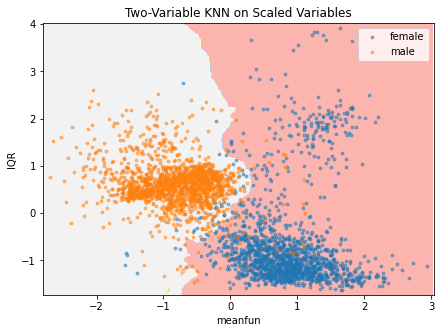

In [60]:
knn_scaled_2 = KNeighborsClassifier(n_neighbors= 19, weights= 'uniform', p = 2).fit(v_scaled[['meanfun', 'IQR']], gender)

x_min, x_max = v_scaled.meanfun.min() - 0.1, v_scaled.meanfun.max() + 0.1
y_min, y_max = v_scaled.IQR.min() - 0.1, v_scaled.IQR.max() + 0.1

h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

Z = knn_scaled_2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


figure(figsize = (7, 5))
plt.contourf(xx, yy, Z, cmap = 'Pastel1')

plt.scatter(v_scaled.meanfun[gender == 0], v_scaled.IQR[gender == 0], s=8, alpha=0.5, label = 'female')
plt.scatter(v_scaled.meanfun[gender == 1], v_scaled.IQR[gender == 1], s=8, alpha=0.5, label = 'male')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.legend()
plt.xlabel('meanfun')
plt.ylabel('IQR')
plt.title('Two-Variable KNN on Scaled Variables')

Text(0.5, 1.0, 'Two-Variable KNN by PCs')

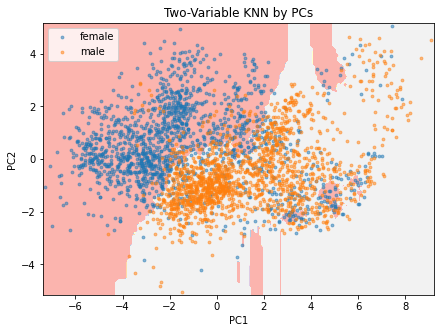

In [61]:
knn_pca_2 = KNeighborsClassifier(n_neighbors= 17, weights= 'uniform', p = 1).fit(v_pca[[1, 2]], gender)

x_min, x_max = v_pca[1].min() - 0.1, v_pca[1].max() + 0.1
y_min, y_max = v_pca[2].min() - 0.1, v_pca[2].max() + 0.1

h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

Z = knn_pca_2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

figure(figsize = (7, 5))
plt.contourf(xx, yy, Z, cmap = 'Pastel1')

plt.scatter(v_pca[1][gender == 0], v_pca[2][gender == 0], s=8, alpha=0.5, label = 'female')
plt.scatter(v_pca[1][gender == 1], v_pca[2][gender == 1], s=8, alpha=0.5, label = 'male')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Two-Variable KNN by PCs')

## 4.2 Multiple KNN

In [62]:
init_check(KNeighborsClassifier(), 'Multiple KNN Metrics', v_scaled)

Initial Multiple KNN Metrics accuracy: 0.953589


In [63]:
knn_data = ['Scaled', 'Scaled uncorrelated', 'PCA']

knn_df_m = cv_stats(knn_gscv, knn_data, knn_hyper_names)

In [64]:
df_viz(knn_df_m, 'Multiple KNN Metrics')

,Data,N neighbors,Weights,p,Accuracy,F1,Precision,Recall
0,Scaled,3,uniform,1,0.954856,0.954787,0.956439,0.954854
1,Scaled uncorrelated,5,uniform,1,0.959588,0.959513,0.961256,0.959569
2,PCA,5,uniform,2,0.953589,0.953473,0.955855,0.953579


## 4.3 Best KNN 

In [65]:
def for_select(gscv_model_use, gscv_model_simp, data_names, hyper_names): 
    for_df = pd.DataFrame()
    hyper_names_2 = ['param_' + hyper.lower().replace(' ', '_') for hyper in hyper_names]

    for names in data_names: # Iterate through data
        data = data_dict[names]

        last = ()
        proxy = []
        variables = []
        var_list = list(data.columns)
        old_score, best_score = 0, 0.1
        temp_df = pd.DataFrame()

        while best_score > old_score: # Forward selection - choose variable with best score
            old_score = best_score
            df = pd.DataFrame()

            for col in var_list: # Iterate through variables and fit
                variables = list(last)
                variables.append(col)

                gscv_fit = gscv_model_simp.fit(data[variables], gender) # Fit model 
                results = gscv_fit.cv_results_
                best_index = np.nonzero(results['rank_test_acc'] == 1)[0][0]

                row_list = [variables, col] # Append scores to list
                for col_name in  hyper_names_2 + ['mean_test_acc']: 
                        row_list.append(results[col_name][best_index])
                    
                scores = pd.DataFrame([row_list], columns = ['Data', 'Single Var'] + hyper_names + ['Accuracy']) # Append list to df 
                df = df.append(scores)

            sliced = df.nlargest(1, 'Accuracy') # Take the highest accuracy of df and append to another df 
            temp_df = temp_df.append(sliced)
            best_score = sliced._get_value(0, 'Accuracy')
            best_var = sliced._get_value(0, 'Single Var')
            var_list.remove(best_var)
            proxy.append(best_var)
            last = tuple(proxy)

        sliced_2 = temp_df.nlargest(1, 'Accuracy') # Take the best selection of variables for data 
        best_vars = sliced_2._get_value(0, 'Data')
        best_vars.sort()
        best_vars_str = [str(x) for x in best_vars]
        best_vars_stringed = ', '.join(best_vars_str)
        

        gscv_fit_2 = gscv_model_use.fit(data[best_vars], gender) # Fit model again 
        results_2 = gscv_fit_2.cv_results_

        row_list = [names + ': ' + best_vars_stringed] # Calculate all errors again
        for col_name in  hyper_names_2 + metric_names_2: 
            row_list.append(results_2[col_name][best_index])

        scores2 = pd.DataFrame([row_list], columns = ['Data'] + hyper_names + metric_names)
        for_df = for_df.append(scores2)  
    return(for_df)

In [66]:
knn_gscv = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv= 10,
    scoring= scoring, n_jobs= -1, refit= 'acc', return_train_score= True)  
knn_gscv_2 = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv= 10,
    scoring= {'acc': 'accuracy'} , n_jobs= -1, refit= 'acc', return_train_score= True) 

for_knn_df = for_select(knn_gscv, knn_gscv_2, knn_data, knn_hyper_names) ### 2600

In [67]:
df_viz(for_knn_df, 'Forward Selected KNN Metrics')

,Data,N neighbors,Weights,p,Accuracy,F1,Precision,Recall
0,"Scaled: IQR, meanfun, mode, sfm, sp.ent",5,uniform,1,0.972542,0.972533,0.973020,0.972542
1,"Scaled uncorrelated: IQR, meanfun, mode",13,uniform,1,0.968756,0.968724,0.969999,0.968735
2,"PCA: 1, 2, 4, 5, 7, 9, 11, 13, 14",3,distance,2,0.964015,0.963982,0.965128,0.964006


In [68]:
def back_select(gscv_model_use, gscv_model_simp, data_names, hyper_names):    
    back_df = pd.DataFrame()
    hyper_names_2 = ['param_' + hyper.lower().replace(' ', '_') for hyper in hyper_names]

    for names in data_names: # Iterate through data
        data = data_dict[names]

        last = (data.columns)
        proxy = []
        variables = []
        var_list = list(data.columns)
        old_score, best_score = 0, 0.1
        temp_df = pd.DataFrame()

        while best_score > old_score: # Backward selection - choose variable with best score
            old_score = best_score
            df = pd.DataFrame()

            for col in var_list: # Iterate through variables and fit
                variables = list(last)
                variables.remove(col)

                gscv_fit = gscv_model_simp.fit(data[variables], gender) # Fit model 
                results = gscv_fit.cv_results_
                best_index = np.nonzero(results['rank_test_acc'] == 1)[0][0]

                row_list = [variables, col] # Append scores to list
                for col_name in  hyper_names_2 + ['mean_test_acc']: 
                        row_list.append(results[col_name][best_index])
                    
                scores = pd.DataFrame([row_list], columns = ['Data', 'Single Var'] + hyper_names + ['Accuracy']) # Append list to df 
                df = df.append(scores)

            sliced = df.nlargest(1, 'Accuracy') # Take the highest accuracy of df and append to another df 
            temp_df = temp_df.append(sliced)
            best_score = sliced._get_value(0, 'Accuracy')
            best_var = sliced._get_value(0, 'Single Var')
            var_list.remove(best_var)
            last = tuple(var_list)

        sliced_2 = temp_df.nlargest(1, 'Accuracy') # Take the best selection of variables for data 
        best_vars = sliced_2._get_value(0, 'Data')
        best_vars.sort()
        best_vars_str = [str(x) for x in best_vars]
        best_vars_stringed = ', '.join(best_vars_str)
        
        gscv_fit_2 = gscv_model_use.fit(data[best_vars], gender) # Fit model again 
        results_2 = gscv_fit_2.cv_results_
        best_index_2 = np.nonzero(results_2['rank_test_acc'] == 1)[0][0]

        row_list = [names + ': ' + best_vars_stringed] # Calculate all errors again
        for col_name in  hyper_names_2 + metric_names_2: 
            row_list.append(results_2[col_name][best_index_2])

        scores2 = pd.DataFrame([row_list], columns = ['Data'] + hyper_names + metric_names)
        back_df = back_df.append(scores2) 
    return(back_df)

In [69]:
back_knn_df = back_select(knn_gscv, knn_gscv_2, knn_data, knn_hyper_names) ### 13000

In [70]:
df_viz(back_knn_df, 'Backward Selected KNN Metrics')

,Data,N neighbors,Weights,p,Accuracy,F1,Precision,Recall
0,"Scaled: IQR, Q25, Q75, centroid, dfrange, maxdom, maxfun, meanfreq, meanfun, median, sfm",5,uniform,2,0.969062,0.969038,0.969925,0.969053
1,"Scaled uncorrelated: IQR, dfrange, meanfun, minfun, mode",17,uniform,1,0.971910,0.971893,0.972714,0.971911
2,"PCA: 1, 2, 4, 5, 7, 9, 11, 13, 14, 18, 19, 20",3,distance,2,0.964015,0.963982,0.965128,0.964006


In [71]:
tog_knn_df = together_df(for_knn_df, back_knn_df)

# 5. Gaussian Naive Bayes

## 5.1 Two-Variable Gaussian Naive Bayes

In [72]:
init_check(GaussianNB(), 'two-variable Gaussian naive Bayes', pred[["meanfun", "IQR"]])

Initial two-variable Gaussian naive Bayes accuracy: 0.966855


In [73]:
gnb_two = GaussianNB().fit(pred[["meanfun", "IQR"]], gender)

Text(0.5, 0, 'meanfun')

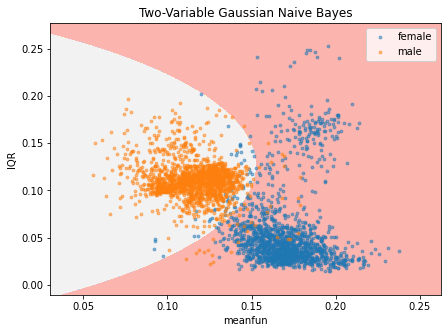

In [74]:
x_min, x_max = voice.meanfun.min() - 0.025, voice.meanfun.max() + 0.025
y_min, y_max = voice.IQR.min() - 0.025, voice.IQR.max() + 0.025

h = 0.0005
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

Z = gnb_two.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, Z, cmap = "Pastel1")

plt.scatter(voice.meanfun[gender == 0], voice.IQR[gender == 0], s=8, alpha=0.5, label = 'female')
plt.scatter(voice.meanfun[gender == 1], voice.IQR[gender == 1], s=8, alpha=0.5, label = 'male')

plt.legend()
plt.title('Two-Variable Gaussian Naive Bayes')
plt.ylabel('IQR')
plt.xlabel('meanfun')

## 5.2 Multivariable Gaussian Naive Bayes

In [75]:
init_check(GaussianNB(), 'Gaussian naive Bayes', pred)

Initial Gaussian naive Bayes accuracy: 0.856341


In [76]:
gnb_param_grid = {'var_smoothing': np.logspace(-9, 0, num= 10)}
gnb_gscv = GridSearchCV(GaussianNB(priors = [0.5, 0.5]), gnb_param_grid, cv= 10,
    scoring= scoring, n_jobs= -1, refit= 'acc', return_train_score = True)
gnb_data = ['Unscaled', 'Unscaled uncorrelated',
    'Scaled', 'Scaled uncorrelated', 
    'PCA',
    'Yeong-Johnson', 'Yeong-Johnson uncorrelated']
gnb_hyper_names = ['Var smoothing']

gnb_df = cv_stats(gnb_gscv, gnb_data, gnb_hyper_names)

In [77]:
df_viz(gnb_df, 'Gaussian Naive Bayes Metrics')

,Data,Var smoothing,Accuracy,F1,Precision,Recall
0,Unscaled,0.000000,0.856341,0.853790,0.873963,0.856120
1,Unscaled uncorrelated,0.000000,0.920438,0.919726,0.928636,0.920301
2,Scaled,0.000000,0.861709,0.859520,0.877992,0.861502
3,Scaled uncorrelated,0.010000,0.919805,0.919102,0.927965,0.919668
4,PCA,0.010000,0.933089,0.932840,0.936807,0.933049
5,Yeong-Johnson,0.000000,0.884125,0.882176,0.896646,0.883974
6,Yeong-Johnson uncorrelated,0.000000,0.946018,0.945813,0.949605,0.945944


## 5.3 Best Gaussian Naive Bayes

In [78]:
gnb_gscv_2 = GridSearchCV(GaussianNB(priors = [0.5, 0.5]), gnb_param_grid, cv= 10,
    scoring= {'acc': 'accuracy'}, n_jobs= -1, refit= 'acc', return_train_score = True)
gnb_data = ['Unscaled', 'Scaled', 'PCA', 'Yeong-Johnson']
gnb_hyper_names = ['Var smoothing']

for_gnb_df = for_select(gnb_gscv, gnb_gscv_2, gnb_data, gnb_hyper_names) ### 100

In [79]:
df_viz(for_gnb_df, 'Forward Selected Gaussian Naive Bayes')

,Data,Var smoothing,Accuracy,F1,Precision,Recall
0,"Unscaled: IQR, meanfun",0.000000,0.966855,0.966814,0.968137,0.966828
1,"Scaled: IQR, Q75, meanfun",0.010000,0.965910,0.965862,0.967339,0.965881
2,"PCA: 1, 2, 3, 4, 5, 7, 9, 11, 15, 16, 17",0.010000,0.953598,0.953490,0.955900,0.953588
3,"Yeong-Johnson: IQR, Q75, meanfun",0.010000,0.968435,0.968398,0.969681,0.968410


In [80]:
back_gnb_df = back_select(gnb_gscv, gnb_gscv_2, gnb_data, gnb_hyper_names) ### 200

In [81]:
come_on = back_gnb_df

In [82]:
df_viz(back_gnb_df, 'Backwards Selected Gaussian Naive Bayes')

,Data,Var smoothing,Accuracy,F1,Precision,Recall
0,"Unscaled: IQR, meanfun",0.010000,0.966856,0.966814,0.968167,0.966830
1,"Scaled: IQR, Q75, meanfun",0.100000,0.966857,0.966800,0.968542,0.966824
2,"PCA: 1, 2, 3, 4, 5, 7, 9, 11, 15, 16, 17, 18, 19, 20",0.010000,0.953598,0.953490,0.955900,0.953588
3,"Yeong-Johnson: IQR, Q75, meanfun",0.010000,0.968435,0.968398,0.969681,0.968410


In [83]:
def together_df(forward, backward):
    backward['Selection Method'] = ['Backwards'] * len(backward)
    forward['Selection Method'] = ['Forwards'] * len(forward)

    backward = backward.reindex(columns = (['Data', 'Selection Method'] + list([i for i in backward.columns if i not in ['Data', 'Selection Method']])))
    forward = forward.reindex(columns = (['Data', 'Selection Method'] + list([i for i in forward.columns if i not in ['Data', 'Selection Method']])))

    together = backward.append(forward, ignore_index= True)
    return(together)

In [84]:
tog_gnb_df = together_df(for_gnb_df, back_gnb_df)

# 6. Linear and Quadratic Discriminant Analysis

## 6.1 Two-Variable LDA

In [85]:
init_check(LinearDiscriminantAnalysis(), 'two variable linear discriminant analysis', pred[['meanfun', 'IQR']])

Initial two variable linear discriminant analysis accuracy: 0.957697


In [86]:
lda_two = LinearDiscriminantAnalysis().fit(pred[['meanfun', 'IQR']], gender)

Text(0.5, 0, 'meanfun')

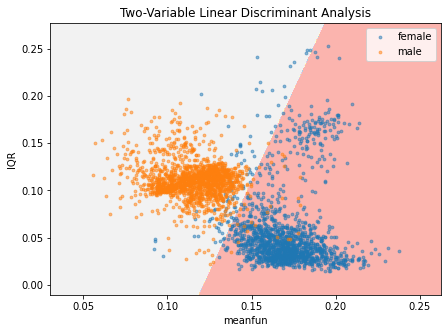

In [87]:
x_min, x_max = voice.meanfun.min() - 0.025, voice.meanfun.max() + 0.025
y_min, y_max = voice.IQR.min() - 0.025, voice.IQR.max() + 0.025

h = 0.0005
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

Z = lda_two.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, Z, cmap = 'Pastel1')

plt.scatter(voice.meanfun[gender == 0], voice.IQR[gender == 0], s=8, alpha=0.5, label = 'female')
plt.scatter(voice.meanfun[gender == 1], voice.IQR[gender == 1], s=8, alpha=0.5, label = 'male')

plt.legend()
plt.title('Two-Variable Linear Discriminant Analysis')
plt.ylabel('IQR')
plt.xlabel('meanfun')

## 6.2 Multivariable LDA

In [88]:
init_check(LinearDiscriminantAnalysis(), 'linear discriminant analysis', pred)

Initial linear discriminant analysis accuracy: 0.963386


In [89]:
lda_param_grid = {'solver': ['svd', 'lsqr', 'eigen'], 
    'shrinkage': np.linspace(0, 0.5, 6)}
lda_gscv = GridSearchCV(LinearDiscriminantAnalysis(priors = [0.5, 0.5]), lda_param_grid, cv= 10, 
    scoring= scoring, n_jobs= -1, refit= 'acc', return_train_score = True)
lda_data = ['Unscaled', 'Unscaled uncorrelated',
    'Scaled', 'Scaled uncorrelated', 
    'PCA',
    'Yeong-Johnson', 'Yeong-Johnson uncorrelated']
lda_hyper_names = ['Solver', 'Shrinkage']

lda_df = cv_stats(lda_gscv, lda_data, lda_hyper_names) 

In [90]:
df_viz(lda_df, 'Linear Discriminant Analysis Metrics')

,Data,Solver,Shrinkage,Accuracy,F1,Precision,Recall
0,Unscaled,lsqr,0.000000,0.963386,0.963357,0.964419,0.963377
1,Unscaled uncorrelated,lsqr,0.000000,0.965600,0.965576,0.966434,0.965588
2,Scaled,lsqr,0.000000,0.963386,0.963357,0.964419,0.963377
3,Scaled uncorrelated,lsqr,0.000000,0.965600,0.965576,0.966434,0.965588
4,PCA,eigen,0.000000,0.964017,0.963987,0.965045,0.964006
5,Yeong-Johnson,lsqr,0.000000,0.963383,0.963349,0.964502,0.963373
6,Yeong-Johnson uncorrelated,lsqr,0.000000,0.966544,0.966523,0.967297,0.966539


## 6.3 Best LDA

In [91]:
lda_gscv_2 = GridSearchCV(LinearDiscriminantAnalysis(priors = [0.5, 0.5]), lda_param_grid, cv= 10, 
    scoring= {'acc': 'accuracy'}, n_jobs= -1, refit= 'acc', return_train_score = True)
lda_data = ['Unscaled', 'Scaled', 'PCA', 'Yeong-Johnson']
lda_hyper_names = ['Solver', 'Shrinkage']

for_lda_df = for_select(lda_gscv, lda_gscv_2, lda_data, lda_hyper_names) ### 100

In [92]:
df_viz(for_lda_df, 'Forward Selected LDA Metrics')

,Data,Solver,Shrinkage,Accuracy,F1,Precision,Recall
0,"Unscaled: Q75, meanfreq, meanfun, median, minfun, mode",lsqr,0.100000,0.967168,0.967127,0.968182,0.967150
1,"Scaled: Q75, meanfreq, meanfun, minfun",lsqr,0.300000,0.965905,0.965851,0.967136,0.965877
2,"PCA: 1, 2, 4, 5, 7, 8, 9, 11",lsqr,0.000000,0.965277,0.965251,0.966197,0.965264
3,"Yeong-Johnson: Q75, meanfreq, meanfun, mindom, minfun, mode",lsqr,0.200000,0.968433,0.968404,0.969346,0.968420


In [93]:
back_lda_df = back_select(lda_gscv, lda_gscv_2, lda_data, lda_hyper_names) # 200

In [94]:
df_viz(back_lda_df, 'Backward Selected LDA Metrics')

,Data,Solver,Shrinkage,Accuracy,F1,Precision,Recall
0,"Unscaled: IQR, Q25, Q75, centroid, dfrange, maxdom, maxfun, meandom, meanfreq, meanfun, mindom, minfun, mode, sfm, skew",lsqr,0.000000,0.966542,0.966523,0.967329,0.966537
1,"Scaled: Q25, centroid, dfrange, kurt, maxdom, maxfun, meandom, meanfreq, meanfun, median, mindom, minfun, mode",lsqr,0.000000,0.968436,0.968415,0.969177,0.968428
2,"PCA: 1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20",eigen,0.000000,0.967487,0.967462,0.968353,0.967479
3,"Yeong-Johnson: IQR, centroid, dfrange, kurt, maxfun, meandom, meanfreq, meanfun, mindom, minfun, mode, modindx, skew",lsqr,0.000000,0.968436,0.968416,0.969147,0.968430


In [95]:
tog_lda_df = together_df(for_lda_df, back_lda_df)

## 6.4 Two-Variable QDA

In [96]:
init_check(QuadraticDiscriminantAnalysis(), 'two-variable quadratic discriminant analysis', pred[['meanfun', 'IQR']])

Initial two-variable quadratic discriminant analysis accuracy: 0.964014


In [97]:
qda_two = QuadraticDiscriminantAnalysis().fit(pred[['meanfun', 'IQR']], gender)

Text(0.5, 0, 'meanfun')

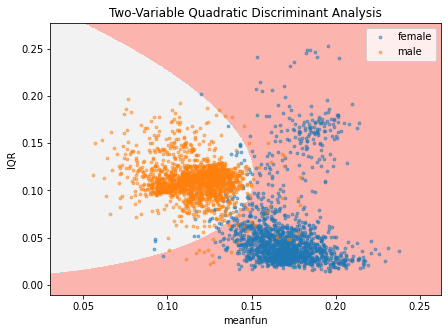

In [98]:
x_min, x_max = voice.meanfun.min() - 0.025, voice.meanfun.max() + 0.025
y_min, y_max = voice.IQR.min() - 0.025, voice.IQR.max() + 0.025

h = 0.0005
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

Z = qda_two.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, Z, cmap = 'Pastel1')

plt.scatter(voice.meanfun[gender == 0], voice.IQR[gender == 0], s=8, alpha=0.5, label = 'female')
plt.scatter(voice.meanfun[gender == 1], voice.IQR[gender == 1], s=8, alpha=0.5, label = 'male')

plt.legend()
plt.title('Two-Variable Quadratic Discriminant Analysis')
plt.ylabel('IQR')
plt.xlabel('meanfun')

## 6.5 Multivariable QDA

In [99]:
init_check(QuadraticDiscriminantAnalysis(), 'quadratic discriminant analysis', pred)

Initial quadratic discriminant analysis accuracy: 0.646071


In [100]:
qda = QuadraticDiscriminantAnalysis(priors = [0.5, 0.5])
qda_param_grid = {'reg_param': np.linspace(0, 0.5, 6), 
    'tol': np.logspace(-6, 0, 4)} 
qda_gscv = GridSearchCV(qda, qda_param_grid, cv= 10, 
    scoring= scoring, n_jobs= -1, refit= 'acc', return_train_score = True)
qda_data = ['Unscaled', 'Unscaled uncorrelated',
    'Scaled', 'Scaled uncorrelated', 
    'PCA',
    'Yeong-Johnson', 'Yeong-Johnson uncorrelated']
qda_hyper_names = ['Reg param', 'Tol']

qda_df = cv_stats(qda_gscv, qda_data, qda_hyper_names)

In [101]:
df_viz(qda_df, 'Quadratic Discriminant Analysis Metrics')

,Data,Reg param,Tol,Accuracy,F1,Precision,Recall
0,Unscaled,0.100000,0.000001,0.655871,0.634924,0.693739,0.655581
1,Unscaled uncorrelated,0.000000,0.000001,0.958647,0.958565,0.960977,0.958648
2,Scaled,0.100000,0.000001,0.956435,0.956335,0.959066,0.956413
3,Scaled uncorrelated,0.000000,0.000001,0.958647,0.958565,0.960977,0.958648
4,PCA,0.100000,0.000001,0.956435,0.956335,0.959066,0.956413
5,Yeong-Johnson,0.100000,0.000001,0.960231,0.960174,0.962073,0.960232
6,Yeong-Johnson uncorrelated,0.000000,0.000001,0.961497,0.961445,0.963210,0.961510


## 6.6 Best QDA

In [102]:
qda_gscv_2 = GridSearchCV(qda, qda_param_grid, cv= 10, 
    scoring= {'acc': 'accuracy'}, n_jobs= -1, refit= 'acc', return_train_score = True)
qda_data = ['Unscaled', 'Scaled', 'PCA', 'Yeong-Johnson']
qda_hyper_names = ['Reg param', 'Tol']

for_qda_df = for_select(qda_gscv, qda_gscv_2, qda_data, qda_hyper_names) ### 200

In [103]:
df_viz(for_qda_df, 'Forward Selected QDA Metrics')

,Data,Reg param,Tol,Accuracy,F1,Precision,Recall
0,"Unscaled: IQR, meandom, meanfun, sfm",0.000000,0.000001,0.970960,0.970938,0.971912,0.970964
1,"Scaled: IQR, meandom, meanfun, sfm",0.000000,0.000001,0.970960,0.970938,0.971912,0.970964
2,"PCA: 1, 2, 4, 5, 6, 7, 9, 16, 17",0.100000,0.000001,0.964334,0.964298,0.965698,0.964336
3,"Yeong-Johnson: IQR, maxfun, meanfun, minfun, sfm",0.000000,0.000001,0.971598,0.971579,0.972588,0.971622


In [104]:
back_qda_df = back_select(qda_gscv, qda_gscv_2, qda_data, qda_hyper_names) # 300

In [105]:
df_viz(back_qda_df, 'Backward Selected QDA Metrics')

,Data,Reg param,Tol,Accuracy,F1,Precision,Recall
0,"Unscaled: IQR, Q25, Q75, dfrange, kurt, maxdom, maxfun, meandom, meanfreq, meanfun, median, mindom, minfun, mode, modindx, sd, sfm, skew",0.100000,0.000001,0.652713,0.631367,0.689959,0.652428
1,"Scaled: IQR, Q25, Q75, centroid, kurt, maxfun, meandom, meanfreq, meanfun, mindom, minfun, mode, sd, sfm, skew, sp.ent",0.100000,0.000001,0.963385,0.963326,0.965218,0.963367
2,"PCA: 1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20",0.100000,0.000001,0.966223,0.966180,0.967747,0.966223
3,"Yeong-Johnson: IQR, Q25, centroid, maxfun, meandom, meanfun, median, mindom, minfun",0.100000,0.000001,0.971591,0.971568,0.972538,0.971603


In [106]:
tog_qda_df = together_df(for_qda_df, back_qda_df)

# 7. Decision Tree

In [107]:
init_check(tree.DecisionTreeClassifier(), 'decision tree', pred)

Initial decision tree accuracy: 0.953587


In [108]:
tree_param_grid = {'criterion': ['gini', 'entropy'], 
    'splitter': ['best', 'random'], 
    'max_depth': list(range(2, 21))}
tree_data = ['Unscaled', 'PCA']
tree_hyper_names = ['Criterion', 'Splitter', 'Max depth']

tree_gscv = GridSearchCV(tree.DecisionTreeClassifier(), tree_param_grid, cv= 10, 
    scoring= scoring, n_jobs= -1, refit= 'acc', return_train_score = True)

tree_df = cv_stats(tree_gscv, tree_data, tree_hyper_names)

In [109]:
df_viz(tree_df, 'Decision Tree Metrics')

,Data,Criterion,Splitter,Max depth,Accuracy,F1,Precision,Recall
0,Unscaled,gini,best,3,0.962434,0.962381,0.963759,0.962417
1,PCA,entropy,best,12,0.918221,0.918113,0.919641,0.918197


In [110]:
gender2 = list()
for i in gender: 
    if i == 1: 
        gender2.append(0)
    else:
        gender2.append(1)

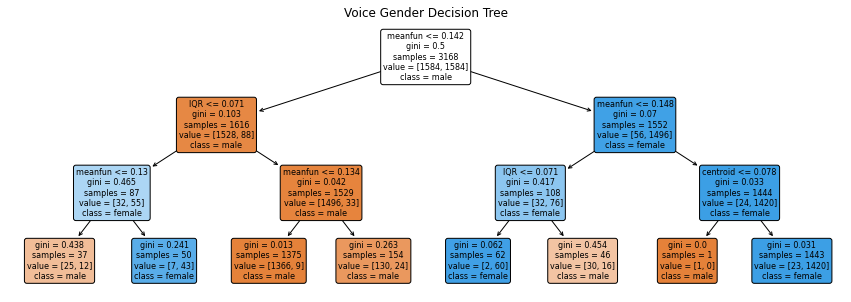

In [111]:
clf = tree.DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = 3).fit(pred, gender2) 

plt.figure(figsize = (15, 5))
tree.plot_tree(clf,
               feature_names = pred.columns, 
               class_names= ['male', 'female'],
               rounded=True, 
               filled = True,
               fontsize= 8)
plt.title('Voice Gender Decision Tree')
plt.show()

# 8. Bagging

In [112]:
init_check(BaggingClassifier(tree.DecisionTreeClassifier()), 'bagging classifier', pred)

Initial bagging classifier accuracy: 0.964325


In [113]:
bagging_param_grid = {'base_estimator__criterion': ['gini', 'entropy'], 
    'base_estimator__splitter': ['best', 'random'],
    'base_estimator__max_depth': list(range(2, 22, 2)),

    'n_estimators': list(range(5, 45, 5)), 
    'max_samples': np.arange(0.2, 1.2, 0.2)
}
bagging_data = {'Unscaled': pred, 'PCA': v_pca}
bagging_hyper_names = ['Base estimator _criterion', 'Base estimator _splitter', 'Base estimator _max depth', 
    'N estimators', 'Max samples']

bagging_gscv = GridSearchCV(BaggingClassifier(tree.DecisionTreeClassifier()), bagging_param_grid, cv= 10,
    scoring= scoring, n_jobs= -1, refit= 'acc', return_train_score = True)

bagging_df = cv_stats(bagging_gscv, bagging_data, bagging_hyper_names) ### 1400 

In [114]:
bagging_df = bagging_df.rename(columns = {'Base estimator _criterion': 'Criterion', 
    'Base estimator _splitter': 'Splitter',
    'Base estimator _max depth': 'Max depth'})

In [115]:
df_viz(bagging_df, 'Bagged Tree Classifier Metrics')

,Data,Criterion,Splitter,Max depth,N estimators,Max samples,Accuracy,F1,Precision,Recall
0,Unscaled,entropy,random,14,40,0.400000,0.972223,0.972199,0.973237,0.972228
1,PCA,gini,random,18,30,1.000000,0.962741,0.962634,0.964780,0.962744


# 9. Random Forest

In [116]:
init_check(RandomForestClassifier(), 'random forrest', pred)

Initial random forrest accuracy: 0.96748


In [117]:
depth = list(range(50, 250, 50))
depth.append(None)

forrest_param_grid = {'n_estimators': list(range(100, 600, 100)), 
    'criterion': ['gini', 'entropy'],
    'max_depth': depth, 
    'max_features': ['auto', 'sqrt', 'log2']
}
forrest_data = {'Unscaled': pred, 'PCA': v_pca}
forrest_hyper_names = ['N estimators', 'Criterion', 'Max depth', 'Max features']

forrest_gscv = GridSearchCV(RandomForestClassifier(), forrest_param_grid, cv= 10, 
    scoring= scoring, n_jobs= -1, refit= 'acc', return_train_score = True)

forrest_df = cv_stats(forrest_gscv, forrest_data, forrest_hyper_names) ### 1200

In [118]:
df_viz(forrest_df, 'Random Forrest Metrics')

,Data,N estimators,Criterion,Max depth,Max features,Accuracy,F1,Precision,Recall
0,Unscaled,100,entropy,50,auto,0.969692,0.969656,0.970805,0.969688
1,PCA,400,gini,100,auto,0.963371,0.963264,0.965445,0.963377


# 10. AdaBoost

In [119]:
init_check(AdaBoostClassifier(), 'AdaBoost', pred)

Initial AdaBoost accuracy: 0.960844


In [120]:
ada_param_grid = {'base_estimator__criterion': ['gini', 'entropy'], 
    'base_estimator__splitter': ['best', 'random'],
    'base_estimator__max_depth': list(range(5, 25, 5)),

    'n_estimators': list(range(25, 125, 25)), 
    'learning_rate': np.arange(0.5, 3.5, 0.5), 
    'algorithm': ['SAMME', 'SAMME.R']
}

ada_data = ['Unscaled', 'PCA']
ada_hyper_names = ['Base estimator _criterion', 'Base estimator _splitter', 
    'Base estimator _max depth', 
    'N estimators', 'Learning rate', 'Algorithm']
ada_gscv = GridSearchCV(AdaBoostClassifier(tree.DecisionTreeClassifier()), ada_param_grid, cv= 10, 
    scoring= scoring, n_jobs= -1, refit= 'acc', return_train_score = True)

ada_df = cv_stats(ada_gscv, ada_data, ada_hyper_names) # 1300

In [121]:
ada_df = ada_df.rename(columns = {'Base estimator _criterion': 'Criterion', 
    'Base estimator _splitter': 'Splitter',
    'Base estimator _max depth': 'Max depth'})

In [122]:
df_viz(ada_df, 'AdaBoost Metrics')

,Data,Criterion,Splitter,Max depth,N estimators,Learning rate,Algorithm,Accuracy,F1,Precision,Recall
0,Unscaled,entropy,best,5,75,2.500000,SAMME.R,0.971585,0.971549,0.972701,0.971589
1,PCA,gini,random,10,50,0.500000,SAMME,0.965588,0.965535,0.967022,0.965584


# 11. Gradient Boost

In [123]:
init_check(XGBClassifier(eval_metric='mlogloss'), 'gradient boost', pred)

Initial gradient boost accuracy: 0.964953


In [124]:
xgb_param_grid = {
    'eta': [0.1, 0.2, 0.3],
    'gamma': list(range(3)), 
    'max_depth': list(range(4, 12, 2)),
    'subsample': np.arange(0.25, 1.25, 0.25), 
    'colsample_bytree': np.arange(0.25, 1.25, 0.25)
}

xgb_hyper_names = list(xgb_param_grid.keys())
xgb_data = ['Unscaled', 'PCA']
xgb_gscv = GridSearchCV(XGBClassifier(eval_metric= 'mlogloss'), xgb_param_grid, cv= 10, 
    scoring= scoring, n_jobs= -1, refit= 'acc', return_train_score = True)

xgb_df = cv_stats(xgb_gscv, xgb_data, xgb_hyper_names) ## 1800

In [125]:
xgb_df = xgb_df.rename(columns = {'eta': 'Eta',
    'gamma': 'Gamma',
    'max_depth': 'Max depth',
    'subsample': 'Subsample',
    'colsample_bytree': 'Columns Sampled'})

In [126]:
df_viz(xgb_df, 'XGBoost Metrics')

,Data,Eta,Gamma,Max depth,Subsample,Columns Sampled,Accuracy,F1,Precision,Recall
0,Unscaled,0.100000,2,8,0.250000,1.000000,0.971270,0.971230,0.972525,0.971272
1,PCA,0.200000,0,6,0.750000,0.500000,0.963059,0.962968,0.965022,0.963050


# 12. Support Vector Classifier

In [127]:
init_check(SVC(), 'support vector classifier', v_scaled)

Initial support vector classifier accuracy: 0.966533


In [128]:
def cv_stats_v3(gscv_model, data_list, hyper_names): 
    df = pd.DataFrame()
    
    hyper_names_2 = ["param_" + hyper.replace(" ", "_") for hyper in hyper_names]

    for item in data_list: 
        gscv_fit = gscv_model.fit(data_dict[item], gender)
        results = gscv_fit.cv_results_
        best_index = np.nonzero(results['rank_test_acc'] == 1)[0][0]

        row_list = [item]

        for col_name in hyper_names_2 + metric_names_2: 
            row_list.append(results[col_name][best_index])
        
        scores = pd.DataFrame([row_list], columns = ["Data"] + hyper_names + metric_names)

        df = df.append(scores)
    
    return df 

In [129]:
svc_param_grid = {
    'C': [ 0.1, 1, 10], 
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [1],
    'gamma': ['scale', 'auto']
}

svc_data = ['Scaled', 'Scaled uncorrelated', 'PCA', 'Yeong-Johnson', 'Yeong-Johnson uncorrelated']
svc_hyper_names = ['C', 'kernel', 'degree', 'gamma']

svc_gscv = GridSearchCV(SVC(), svc_param_grid, cv= 10, 
    scoring= scoring, n_jobs= -1, refit= 'acc', return_train_score = True)

svc_df = cv_stats_v3(svc_gscv, svc_data, svc_hyper_names) # 100

In [130]:
df_viz(svc_df, 'Support Vector Classifier Metrics')

,Data,C,kernel,degree,gamma,Accuracy,F1,Precision,Recall
0,Scaled,0.100000,linear,1,scale,0.970647,0.970634,0.971310,0.970637
1,Scaled uncorrelated,0.100000,linear,1,scale,0.971909,0.971894,0.972551,0.971895
2,PCA,0.100000,linear,1,scale,0.970647,0.970634,0.971310,0.970637
3,Yeong-Johnson,1.000000,poly,1,scale,0.968752,0.968737,0.969450,0.968752
4,Yeong-Johnson uncorrelated,1.000000,rbf,1,scale,0.968747,0.968705,0.970064,0.968745


In [131]:
###### MAKE BACKWARDS
def back_select_2(gscv_model_use, gscv_model_simp, data_names, hyper_names):    
    back_df = pd.DataFrame()
    hyper_names_2 = ["param_" + hyper.replace(" ", "_") for hyper in hyper_names]

    for names in data_names: # Iterate through data
        data = data_dict[names]

        last = (data.columns)
        proxy = []
        variables = []
        var_list = list(data.columns)
        old_score, best_score = 0, 0.1
        temp_df = pd.DataFrame()

        while best_score > old_score: # Backward selection - choose variable with best score
            old_score = best_score
            df = pd.DataFrame()

            for col in var_list: # Iterate through variables and fit
                variables = list(last)
                variables.remove(col)

                gscv_fit = gscv_model_simp.fit(data[variables], gender) # Fit model 
                results = gscv_fit.cv_results_
                best_index = np.nonzero(results['rank_test_acc'] == 1)[0][0]

                row_list = [variables, col] # Append scores to list
                for col_name in  hyper_names_2 + ['mean_test_acc']: 
                        row_list.append(results[col_name][best_index])
                    
                scores = pd.DataFrame([row_list], columns = ["Data", 'Single Var'] + hyper_names + ['Accuracy']) # Append list to df 
                df = df.append(scores)

            sliced = df.nlargest(1, 'Accuracy') # Take the highest accuracy of df and append to another df 
            temp_df = temp_df.append(sliced)
            best_score = sliced._get_value(0, 'Accuracy')
            best_var = sliced._get_value(0, 'Single Var')
            var_list.remove(best_var)
            last = tuple(var_list)

        sliced_2 = temp_df.nlargest(1, 'Accuracy') # Take the best selection of variables for data 
        best_vars = sliced_2._get_value(0, 'Data')
        best_vars.sort()
        best_vars_str = [str(x) for x in best_vars]
        best_vars_stringed = ', '.join(best_vars_str)
        
        gscv_fit_2 = gscv_model_use.fit(data[best_vars], gender) # Fit model again 
        results_2 = gscv_fit_2.cv_results_
        best_index_2 = np.nonzero(results_2['rank_test_acc'] == 1)[0][0]

        row_list = [names + ': ' + best_vars_stringed] # Calculate all errors again
        for col_name in  hyper_names_2 + metric_names_2: 
            row_list.append(results_2[col_name][best_index_2])

        scores2 = pd.DataFrame([row_list], columns = ["Data"] + hyper_names + metric_names)
        back_df = back_df.append(scores2) 
    return(back_df)

In [132]:
svc_data = ["Scaled", "PCA", "Yeong-Johnson"]
svc_gscv_2 = GridSearchCV(SVC(), svc_param_grid, cv= 10, 
    scoring= {'acc':'accuracy'}, n_jobs= -1, refit= "acc", return_train_score = True)
svc_gscv = GridSearchCV(SVC(), svc_param_grid, cv= 10, 
    scoring= scoring, n_jobs= -1, refit= "acc", return_train_score = True)

back_svc_df = back_select_2(svc_gscv, svc_gscv_2, svc_data, svc_hyper_names)  ### 3800

In [133]:
df_viz(back_svc_df, 'Backwards Selected Vector Classifier Metrics')

,Data,C,kernel,degree,gamma,Accuracy,F1,Precision,Recall
0,"Scaled: Q25, Q75, centroid, dfrange, maxdom, maxfun, meandom, meanfreq, meanfun, median, minfun, mode, modindx, sfm, skew, sp.ent",1.000000,poly,1,auto,0.972856,0.972844,0.973410,0.972845
1,"PCA: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20",0.100000,linear,1,scale,0.971594,0.971581,0.972206,0.971583
2,"Yeong-Johnson: IQR, Q25, Q75, centroid, dfrange, kurt, maxdom, meanfun, median, mindom, minfun, mode, modindx, sd, sfm, skew, sp.ent",1.000000,poly,1,scale,0.971278,0.971262,0.972110,0.971278


In [134]:
def for_select_2(gscv_model_use, gscv_model_simp, data_names, hyper_names): 
    for_df = pd.DataFrame()
    hyper_names_2 = ["param_" + hyper.replace(" ", "_") for hyper in hyper_names]

    for names in data_names: # Iterate through data
        data = data_dict[names]

        last = ()
        proxy = []
        variables = []
        var_list = list(data.columns)
        old_score, best_score = 0, 0.1
        temp_df = pd.DataFrame()

        while best_score > old_score: # Forward selection - choose variable with best score
            old_score = best_score
            df = pd.DataFrame()

            for col in var_list: # Iterate through variables and fit
                variables = list(last)
                variables.append(col)

                gscv_fit = gscv_model_simp.fit(data[variables], gender) # Fit model 
                results = gscv_fit.cv_results_
                best_index = np.nonzero(results['rank_test_acc'] == 1)[0][0]

                row_list = [variables, col] # Append scores to list
                for col_name in  hyper_names_2 + ['mean_test_acc']: 
                        row_list.append(results[col_name][best_index])
                    
                scores = pd.DataFrame([row_list], columns = ["Data", 'Single Var'] + hyper_names + ['Accuracy']) # Append list to df 
                df = df.append(scores)

            sliced = df.nlargest(1, 'Accuracy') # Take the highest accuracy of df and append to another df 
            temp_df = temp_df.append(sliced)
            best_score = sliced._get_value(0, 'Accuracy')
            best_var = sliced._get_value(0, 'Single Var')
            var_list.remove(best_var)
            proxy.append(best_var)
            last = tuple(proxy)

        sliced_2 = temp_df.nlargest(1, 'Accuracy') # Take the best selection of variables for data 
        best_vars = sliced_2._get_value(0, 'Data')
        best_vars.sort()
        best_vars_str = [str(x) for x in best_vars]
        best_vars_stringed = ', '.join(best_vars_str)
        

        gscv_fit_2 = gscv_model_use.fit(data[best_vars], gender) # Fit model again 
        results_2 = gscv_fit_2.cv_results_

        row_list = [names + ': ' + best_vars_stringed] # Calculate all errors again
        for col_name in  hyper_names_2 + metric_names_2: 
            row_list.append(results_2[col_name][best_index])

        scores2 = pd.DataFrame([row_list], columns = ["Data"] + hyper_names + metric_names)
        for_df = for_df.append(scores2)  
    return(for_df)

In [135]:
for_svc_df = for_select_2(svc_gscv, svc_gscv_2, svc_data, svc_hyper_names) # 6900

In [136]:
df_viz(for_svc_df, 'Forwards Selected Vector Classifier Metrics')

,Data,C,kernel,degree,gamma,Accuracy,F1,Precision,Recall
0,"Scaled: IQR, meanfun, minfun, mode",1,linear,1,scale,0.970330,0.970312,0.971089,0.970327
1,"PCA: 1, 2, 4, 5, 6, 7, 8, 9",10,poly,1,scale,0.973803,0.973791,0.974426,0.973800
2,"Yeong-Johnson: IQR, maxdom, meanfun, minfun, sp.ent",10,rbf,1,auto,0.973486,0.973471,0.974244,0.973491


# 13. Neural Network 

In [137]:
init_check(MLPClassifier(), 'multilayer perception neural network network', v_scaled)

Initial multilayer perception neural network network accuracy: 0.958642


In [138]:
mlp_param_grid = {
    "activation": ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'alpha': np.logspace(-4, 0, num = 5, base = 10)
}

mlp_data = ['Scaled', 'Scaled uncorrelated', 'PCA']
mlp_hyper_names = ['Activation', 'Solver', 'Learning Rate', 'Alpha']
mlp_gscv = GridSearchCV(MLPClassifier(), mlp_param_grid, cv= 10, 
    scoring= scoring, n_jobs= -1, refit= "acc", return_train_score = True)

mlp_df = cv_stats(mlp_gscv, mlp_data, mlp_hyper_names) # 2700

In [139]:
df_viz(mlp_df, 'MLP Neural Network Metrics')

,Data,Activation,Solver,Learning Rate,Alpha,Accuracy,F1,Precision,Recall
0,Scaled,relu,sgd,adaptive,0.010000,0.969694,0.969656,0.971026,0.969692
1,Scaled uncorrelated,identity,sgd,constant,0.010000,0.969698,0.969673,0.970578,0.969684
2,PCA,tanh,sgd,constant,0.000100,0.970645,0.970622,0.971514,0.970629


# 14. Stacked Ensemble (WIP)

In [140]:
df_dict = {'Logistic Regression': log_df, 
    'Ridge Regression': ridge_df, 
    'K Nearest Neighbors': best_knn_df, # Uses correlation df, not forward selection
    'Gaussian Naive Bayes': gnb_df, 
    'Linear Discriminant Analysis': lda_df, 
    # 'Quadratic Discriminant Analysis': qda_df, 
    'Multi-Layer Perception': mlp_df, # Change name to lower 
    'Tree Classifier': tree_df, 
    'Random Forrest': forrest_df, # Shorten name 
    'AdaBoost': ada_df, 
    'Gradient Boost': gb_df, # gb_df 
    'Support Vector Classifier': svc_df
    }

the_df = pd.DataFrame()
for key in df_dict:
    row = df_dict[key].nlargest(1, 'Accuracy')
    row = row[['Data', 'Accuracy', 'F1', 'Precision', 'Recall']].reset_index()
    the_df = the_df.append({'Model': key, 'Data': row._get_value(0, 'Data'), 'Accuracy': row._get_value(0, 'Accuracy'),
    'F1': row._get_value(0, 'F1'), 'Precision': row._get_value(0, 'Precision'), 'Recall': row._get_value(0, 'Recall'),}, ignore_index= True)

the_df = the_df[['Model', 'Data', 'Accuracy', 'F1', 'Precision', 'Recall']]

the_df.sort_values('Accuracy', ascending= False
    ).style.background_gradient(cmap = "Blues"
    ).set_caption("Optimized Metrics per ML Method")

NameError: name 'best_knn_df' is not defined

In [ ]:
class uncorr_pipe(BaseEstimator, TransformerMixin):
    def __init__(self):
        super().__init__()

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None): 
        return X[uncorr_var]

In [ ]:
class knn_pipe(BaseEstimator, TransformerMixin):
    def __init__(self):
        super().__init__()

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None): 
        return X[['meanfun', 'IQR', 'sp.ent']]

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
classifier_labels = ['svc', 'gboost', 'knn', 'log']
combo_classifiers = []

for ii in range(2, len(classifier_labels)+1):
    for subset in itertools.combinations(classifier_labels, ii):
        combo_classifiers.append(subset)

combo_classifiers

In [ ]:
estimators = [
    ('svc', make_pipeline(uncorr_pipe(), StandardScaler(), SVC(C= 10, kernel= 'linear', degree= 1, gamma= 'scale'))), 
    ('gboost', GradientBoostingClassifier(loss= 'deviance', learning_rate= 0.1, n_estimators= 300, subsample= 0.5, max_depth= 5)), 
    ('knn', make_pipeline(knn_pipe(), StandardScaler(), KNeighborsClassifier(n_neighbors= 12, weights= 'distance', p= 1))),
    ('log', make_pipeline(uncorr_pipe(), StandardScaler(), LogisticRegression(C= 0.046416))),
    ('GNB', make_pipeline(PowerTransformer(), GaussianNB(var_smoothing= 0))),
    ('LDA', make_pipeline(uncorr_pipe(), PowerTransformer(), LinearDiscriminantAnalysis(solver= 'lsqr', shrinkage= 0))),
    ('MLP', make_pipeline(uncorr_pipe(), StandardScaler(), MLPClassifier(activation= 'identity', solver= 'sgd', learning_rate= 'constant', alpha= 1)))
]
# SVC, Gradient Boost, KNN, Logistic Regression (or ridge regreesion), LDA (or QDA), GNB???

clf = StackingClassifier(
    estimators= estimators, final_estimator = LogisticRegression()
)

np.mean(cross_val_score(clf, pred, gender, cv= 10, scoring= 'accuracy'))